# Example of usage with price elasticity

This notebook presents a simple example of an AeroMAPS scenario in which both the demand and the offer are affected by the evolution of the energy prices.  
This work is published in chapter 11 of [this thesis](https://theses.fr/2025ESAE0001).

## Load and process

As usually, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic_cost_feedback,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_emissions,
    models_energy_cost,
    models_operation_cost_top_down_feedback,
)

import gemseo as gm
import pandas as pd

from aeromaps.utils.functions import custom_logger_config

custom_logger_config(gm.configure_logger())

<RootLogger root (INFO)>

In [2]:
models = {
    "models_traffic_cost_feedback": models_traffic_cost_feedback,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_emissions": models_emissions,
    "models_energy_cost": models_energy_cost,
    "models_operation_cost_top_down_feedback": models_operation_cost_top_down_feedback,
}

In [3]:
process = create_process(
    configuration_file="data_elasticity/config_elasticity.json",
    models=models,
)

 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.
 WARNING - 19:12:20: The Args section is missing.


## Set up variables

### Aviation scenario

In [4]:
process.parameters.price_elasticity = -0.9

In [5]:
# Default ("business as usual" --> in our case considering frozen technology in 2019 and 100% kerozene) Air traffic evolution

# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

# ## Drop-in aircraft
# ### Mean annual efficiency gains by category [%]
# process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [0.0000000001]
# process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [0.0000000001]
# process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [0.0000000001]


# # Aircraft fleet and operation evolution - Operations

# ## Values for setting the logistic function
# process.parameters.operations_final_gain = 0.0000000001  # [%]
# process.parameters.operations_start_year = 2025
# process.parameters.operations_duration = 25.0

# process.parameters.load_factor_end_year = 82.39931200000001  # 2019 value: 82.399312

# ## Growth rate by category [%]
# process.parameters.cagr_passenger_short_range_reference_periods = []
# process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
# process.parameters.cagr_passenger_medium_range_reference_periods = []
# process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
# process.parameters.cagr_passenger_long_range_reference_periods = []
# process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
# process.parameters.cagr_freight_reference_periods = []
# process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft energy - Introduction of alternative drop-in fuels --> none here


## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 0.0, 0.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 0.0, 0.0, 0.0]

In [7]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    500,
    500,
    500,
    500,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

In [8]:
# With the eleasticity there is a coupling llop bewteen airfare and traffic.
# The solver needs to enter in the loop at some point, and thus some coupling varaibles needs to have a default value. If not done in the models, one can do it here or in the input files.

process.parameters.airfare_per_rpk = pd.Series(
    0.082949239,
    index=range(process.parameters.historic_start_year, process.parameters.end_year + 1),
)

In [9]:
process.compute()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_mfsp_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
    INFO - 19:12:23: MDAGaussSeidel running... Normalized residual norm = 1.00e+00 (iter. 1)
    INFO - 19:12:23: MDAGaussSeidel running... Normalized residual norm = 1.00e+00 (iter. 1)
    INFO - 19:12:23: MDAGaussSeidel running... Normalized residual norm = 2.97e-02 (iter. 2)
    INFO - 19:12:23: MDAGaussSeidel running... Normalized 

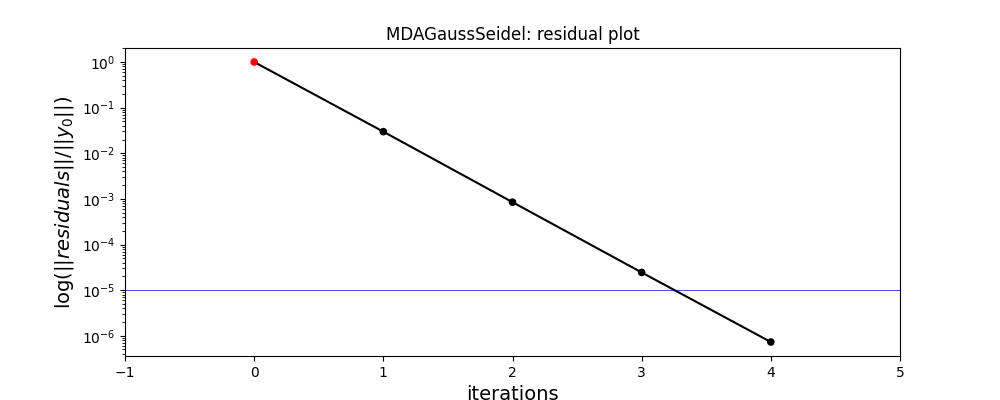

In [10]:
process.mda_chain.plot_residual_history(show=True, save=False, fig_size=(10.0, 4.0))

In [11]:
rpk_with_elast = process.data["vector_outputs"]["rpk"]
rpk_no_elast = process.data["vector_outputs"]["rpk_no_elasticity"]

In [12]:
rpk_with_elast / rpk_no_elast

2000    1.000000
2001    1.000000
2002    1.000000
2003    1.000000
2004    1.000000
2005    1.000000
2006    1.000000
2007    1.000000
2008    1.000000
2009    1.000000
2010    1.000000
2011    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    1.000000
2020    1.000000
2021    1.000000
2022    1.000000
2023    1.000000
2024    1.000000
2025    0.703877
2026    0.710825
2027    0.717848
2028    0.724949
2029    0.732129
2030    0.739392
2031    0.742769
2032    0.746475
2033    0.750503
2034    0.754842
2035    0.759481
2036    0.764406
2037    0.769601
2038    0.775044
2039    0.780714
2040    0.786584
2041    0.787027
2042    0.788023
2043    0.789519
2044    0.791469
2045    0.793833
2046    0.796576
2047    0.799673
2048    0.803102
2049    0.806844
2050    0.810889
dtype: float64

In [13]:
process.data["vector_outputs"]["total_cost_per_rpk_without_extra_tax"][2019]

0.08986169909982476

In [14]:
process.data["vector_outputs"]["total_cost_per_rpk_without_extra_tax"][2019] + 0.003983

0.09384469909982476

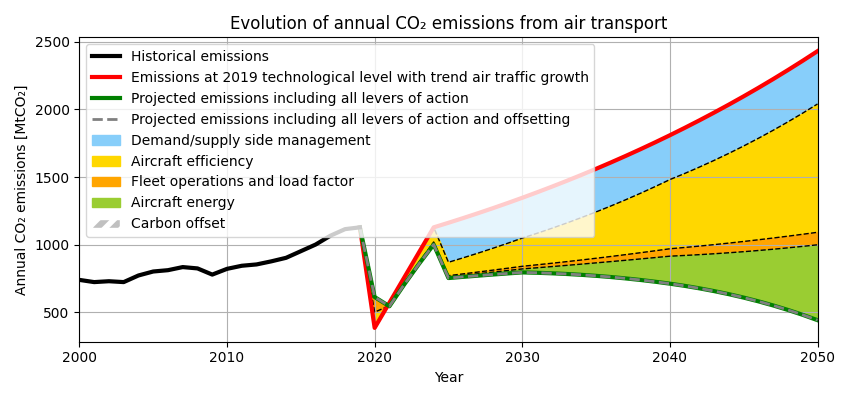

In [15]:
process.plot("air_transport_co2_emissions")

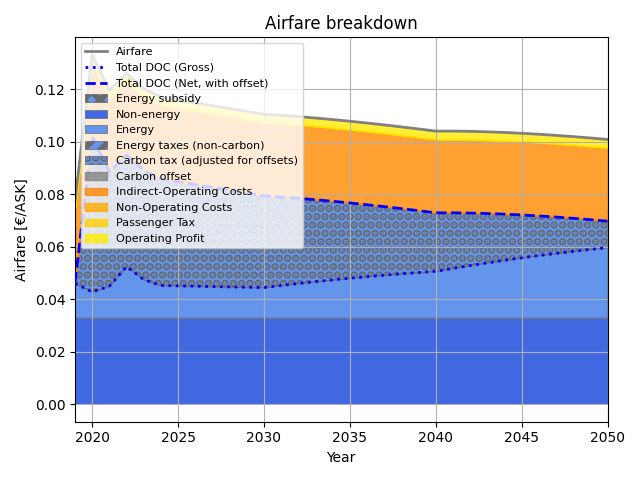

In [16]:
process.plot("airfare_breakdown")

In [17]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())

    INFO - 19:12:25: 🧹 clean_notebooks_on_tests called
    INFO - 19:12:25: ⏭ Skipping cleanup during notebook run
